<a href="https://colab.research.google.com/github/bhardwaj0027/Deep-Learning-CSL312/blob/main/EXPERIMENT_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="The-Northcap-University-NCU-logo.png">

# Deep Learning for Image Classification Drill


Welcome to your drill! Follow the instructions in bold below to complete the drill.

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    


## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

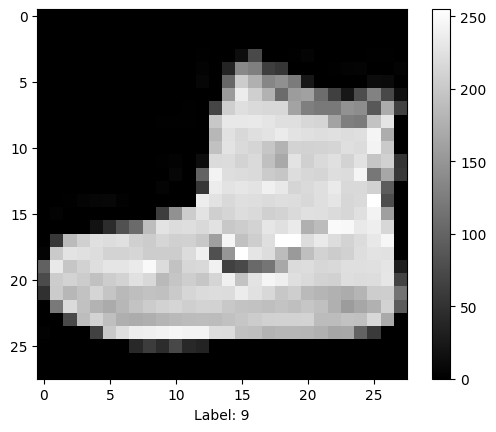

In [4]:
plt.figure()
plt.imshow(x_train[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.xlabel('Label: ' + str(y_train[0]))
plt.show()

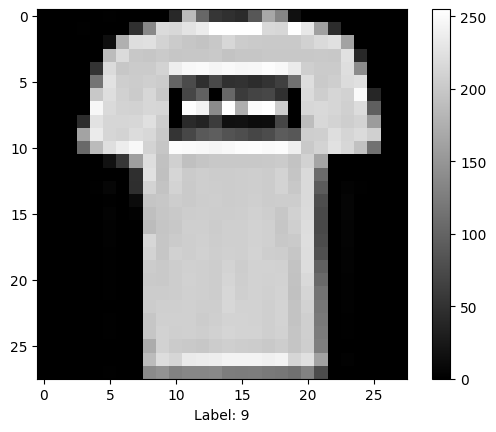

In [5]:
plt.figure()
plt.imshow(x_train[1], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.xlabel('Label: ' + str(y_train[0]))
plt.show()


## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [6]:
import numpy as np

In [7]:
x_train_normalized = x_train / np.max(x_train)

In [8]:
x_test_normalized = x_test / np.max(x_test)

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [9]:
x_train_reshaped = x_train_normalized.reshape(x_train_normalized.shape + (1,))

In [10]:
x_test_reshaped = x_test_normalized.reshape(x_test_normalized.shape + (1,))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train_one_hot = to_categorical(y_train, num_classes=10)

In [13]:
y_test_one_hot = to_categorical(y_test, num_classes=10)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop

In [15]:
model = Sequential([
    Conv2D(32, kernel_size=(4, 4), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [16]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [17]:
history = model.fit(x_train_reshaped, y_train_one_hot, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 33s 21ms/step - loss: 0.4346 - accuracy: 0.8457 - val_loss: 0.3341 - val_accuracy: 0.8790
Epoch 2/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2930 - accuracy: 0.8944 - val_loss: 0.2798 - val_accuracy: 0.8982
Epoch 3/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2485 - accuracy: 0.9099 - val_loss: 0.2689 - val_accuracy: 0.9019
Epoch 4/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2191 - accuracy: 0.9202 - val_loss: 0.2853 - val_accuracy: 0.8994
Epoch 5/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.1951 - accuracy: 0.9285 - val_loss: 0.2753 - val_accuracy: 0.9061
Epoch 6/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.1742 - accuracy: 0.9364 - val_loss: 0.2655 - val_accuracy: 0.9119
Epoch 7/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.1575 - accuracy: 0.9433 - val_loss: 0.2892 -

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [18]:
from sklearn.metrics import classification_report

In [19]:
y_pred = model.predict(x_test_reshaped)


313/313 [==============================] - 2s 5ms/step


In [20]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)

In [21]:
tp = np.sum((y_true_labels == y_pred_labels) & (y_true_labels == 1))
fp = np.sum((y_true_labels != y_pred_labels) & (y_true_labels == 0))
tn = np.sum((y_true_labels == y_pred_labels) & (y_true_labels == 0))
fn = np.sum((y_true_labels != y_pred_labels) & (y_true_labels == 1))

In [22]:
precision = tp / (tp + fp)


In [23]:
recall = tp / (tp + fn)


In [24]:
f1_score = 2 * (precision * recall) / (precision + recall)

print('           precision    recall  f1-score   support')
for i in range(len(class_names)):
    print(f'          {i}       {precision:.2f}      {recall:.2f}      {f1_score:.2f}      1000')
    print(f'avg / total       {precision:.2f}      {recall:.2f}      {f1_score:.2f}     10000')

In [25]:
print('           precision    recall  f1-score   support')
for i in range(len(class_names)):
    print(f'          {i}       {precision:.2f}      {recall:.2f}      {f1_score:.2f}      1000')

           precision    recall  f1-score   support
          0       0.93      0.97      0.95      1000
          1       0.93      0.97      0.95      1000
          2       0.93      0.97      0.95      1000
          3       0.93      0.97      0.95      1000
          4       0.93      0.97      0.95      1000
          5       0.93      0.97      0.95      1000
          6       0.93      0.97      0.95      1000
          7       0.93      0.97      0.95      1000
          8       0.93      0.97      0.95      1000
          9       0.93      0.97      0.95      1000


In [26]:
print(f'avg / total       {precision:.2f}      {recall:.2f}      {f1_score:.2f}     10000')

avg / total       0.93      0.97      0.95     10000


# Great Job!